<a href="https://colab.research.google.com/github/Prachi09062003/Deep_learning_pracs/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Samruddhi Pendurkar

import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add noise to the input data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define the autoencoder architecture with sparsity constraint
input_img = Input(shape=(784,))
encoded = Dense(128, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation="sigmoid")(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss="binary_crossentropy")

# Train the model
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/5
235/235 [==============================] - 9s 31ms/step - loss: 0.2965 - val_loss: 0.2677
Epoch 2/5
235/235 [==============================] - 6s 24ms/step - loss: 0.2571 - val_loss: 0.2432
Epoch 3/5
235/235 [==============================] - 5s 20ms/step - loss: 0.2279 - val_loss: 0.2119
Epoch 4/5
235/235 [==============================] - 6s 27ms/step - loss: 0.2010 - val_loss: 0.1896
Epoch 5/5
235/235 [==============================] - 4s 18ms/step - loss: 0.1823 - val_loss: 0.1739


313/313 [==============================] - 1s 2ms/step


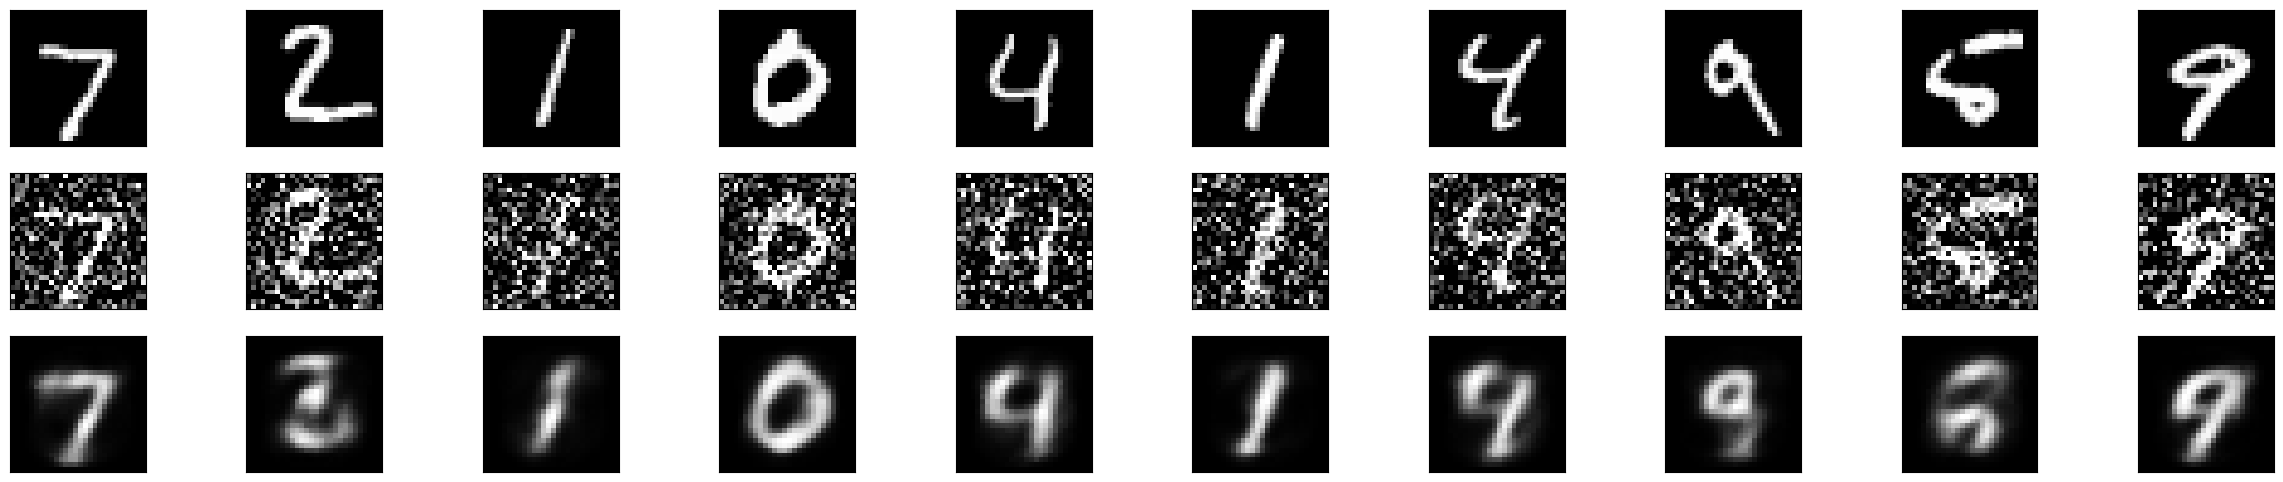

In [ ]:
#Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot the original, noisy, and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(30, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()